In [1]:
!wget http://www.ecuadorencifras.gob.ec/documentos/datos/Poblacion_y_Demografia/entradas_salidas_internac/CSV/bdd_entradas_salidas_internacionales_2017_CSV.zip

--2018-07-21 10:15:30--  http://www.ecuadorencifras.gob.ec/documentos/datos/Poblacion_y_Demografia/entradas_salidas_internac/CSV/bdd_entradas_salidas_internacionales_2017_CSV.zip
Resolving www.ecuadorencifras.gob.ec (www.ecuadorencifras.gob.ec)... 190.152.152.79
Connecting to www.ecuadorencifras.gob.ec (www.ecuadorencifras.gob.ec)|190.152.152.79|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83413023 (80M) [application/zip]
Saving to: ‘bdd_entradas_salidas_internacionales_2017_CSV.zip’

bdd_entradas_salida 100%[===================>]  79.55M   378KB/s    in 4m 37s  

2018-07-21 10:20:08 (294 KB/s) - ‘bdd_entradas_salidas_internacionales_2017_CSV.zip’ saved [83413023/83413023]



In [2]:
!mkdir ecuador-migration-data-2017

In [3]:
!unzip bdd_entradas_salidas_internacionales_2017_CSV.zip -d ecuador-migration-data-2017/

Archive:  bdd_entradas_salidas_internacionales_2017_CSV.zip
   creating: ecuador-migration-data-2017/Datos_Abiertos_ESI_2017/
  inflating: ecuador-migration-data-2017/Datos_Abiertos_ESI_2017/Diccionario ESI 2017.xls  
  inflating: ecuador-migration-data-2017/Datos_Abiertos_ESI_2017/ESI_2017.csv  
  inflating: ecuador-migration-data-2017/Datos_Abiertos_ESI_2017/Metadatos ESI 2017.xls  


In [4]:
!head ecuador-migration-data-2017/Datos_Abiertos_ESI_2017/ESI_2017.csv

In [5]:
!file -i ecuador-migration-data-2017/Datos_Abiertos_ESI_2017/ESI_2017.csv

ecuador-migration-data-2017/Datos_Abiertos_ESI_2017/ESI_2017.csv: text/plain; charset=iso-8859-1


In [6]:
ECMI2017='ecuador-migration-data-2017/Datos_Abiertos_ESI_2017/ESI_2017.csv'

In [7]:
!iconv -f ISO-8859-1 -t UTF-8//TRANSLIT $ECMI2017 -o ECMI2017_utf.csv

In [8]:
!head ECMI2017_utf.csv

In [1]:
!head -n 1000000 ECMI2017_utf.csv > ECMI2017_utf_1m.csv

In [1]:
!head -n 100000 ECMI2017_utf.csv > ECMI2017_utf_1th.csv

In [3]:
!head ECMI2017_utf_1m.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import multiprocessing as mp

In [10]:
LARGE_FILE = "ECMI2017_utf.csv"
CHUNKSIZE = 1000000 # processing 100,000 rows at a time

In [11]:
%%time
def process_frame(df):
        # process data frame
        return len(df)

if __name__ == '__main__':
        reader = pd.read_table(LARGE_FILE, chunksize=CHUNKSIZE)

        result = 0
        for df in reader:
                # process each data frame
                result += process_frame(df)

        print "There are %d rows of data"%(result)

There are 6180175 rows of data
CPU times: user 34.8 s, sys: 4.02 s, total: 38.8 s
Wall time: 38.7 s


In [13]:
%%time
def process_frame(df):
        # process data frame
        return len(df)

if __name__ == '__main__':
        reader = pd.read_table(LARGE_FILE, chunksize=CHUNKSIZE)
        pool = mp.Pool(2) # use 4 processes

        funclist = []
        for df in reader:
                # process each data frame
                f = pool.apply_async(process_frame,[df])
                funclist.append(f)

        result = 0
        for f in funclist:
                result += f.get(timeout=10) # timeout in 10 seconds

        print "There are %d rows of data"%(result)

There are 6180175 rows of data
CPU times: user 48.2 s, sys: 11.9 s, total: 1min
Wall time: 58.9 s


In [ ]:
%%time
def process_frame(df):
        # process data frame
        return len(df)

if __name__ == '__main__':
        reader = pd.read_table(LARGE_FILE, chunksize=CHUNKSIZE)
        pool = mp.Pool(2) # use 4 processes

        funclist = []
        for df in reader:
                # process each data frame
                f = pool.apply_async(process_frame,[df])
                funclist.append(f)

        result = 0
        for f in funclist:
                result += f.get(timeout=10) # timeout in 10 seconds

        print "There are %d rows of data"%(result)

In [ ]:
%%time
def process_frame(df):
        # process data frame
        return len(df)

if __name__ == '__main__':
        reader = pd.read_table(LARGE_FILE, chunksize=CHUNKSIZE)
        pool = mp.Pool(2) # use 4 processes

        funclist = []
        for df in reader:
                # process each data frame
                f = pool.apply_async(process_frame,[df])
                funclist.append(f)

        result = 0
        for f in funclist:
                result += f.get(timeout=10) # timeout in 10 seconds

        print "There are %d rows of data"%(result)

In [23]:
inout2017 = pd.read_csv('ECMI2017_utf.csv', names=['cod_estd' , 'secuencial' , 'tip_movi' , 'tip_naci' , 'anio_movi' , 'mes_movi' , 'dia_movi' , 'sex_migr' , 'nac_migr' , 'subcont_nac' , 'cont_nac' , 'via_tran' , 'mot_viam' , 'pais_prod' , 'subcont_prod' , 'cont_prod' , 'lug_prod' , 'pais_res' , 'subcont_res' , 'cont_res' , 'jef_migr' , 'pro_jefm' , 'can_jefm' , 'cla_migr' , 'ocu_migr' , 'edad' , 'pais_esc' , 'lug_esc'
], sep=';')

In [6]:
inout2017

,cod_estd,secuencial,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,subcont_nac,...,subcont_res,cont_res,jef_migr,pro_jefm,can_jefm,cla_migr,ocu_migr,edad,pais_esc,lug_esc
0,cod_estd,secuencial,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,subcont_nac,...,subcont_res,cont_res,jef_migr,pro_jefm,can_jefm,cla_migr,ocu_migr,edad,pais_esc,lug_esc
1,ESI,1,Entrada,Extranjero,2017,Octubre,1,Hombre,Sin especificar,Sin especificar,...,Europa Meridional,Europa,Aeropuerto Internacional José Joaquín de Olmedo,Guayas,Guayaquil,No inmigrante T-3,Personal de apoyo administrativo no clasificad...,36,Países Bajos,Amsterdam
2,ESI,2,Entrada,Extranjero,2017,Junio,8,Mujer,Zambia,África Oriental,...,América del Septentrional,América,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Personal de apoyo administrativo no clasificad...,45,Estados Unidos de América,Miami Florida
3,ESI,3,Entrada,Extranjero,2017,Mayo,28,Mujer,Zambia,África Oriental,...,África Oriental,África,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Directores generales y gerentes generales,37,Países Bajos,Amsterdam
4,ESI,4,Entrada,Extranjero,2017,Marzo,13,Mujer,Zambia,África Oriental,...,África Oriental,África,Aeropuerto Internacional José Joaquín de Olmedo,Guayas,Guayaquil,No inmigrante T-3,Directores generales y gerentes generales,42,Países Bajos,Amsterdam
5,ESI,5,Entrada,Extranjero,2017,Julio,2,Mujer,Zambia,África Oriental,...,América del Septentrional,América,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Amas de casa,44,Estados Unidos de América,Dallas Texas
6,ESI,6,Entrada,Extranjero,2017,Mayo,12,Mujer,Zambia,África Oriental,...,América del Septentrional,América,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Tecnicos en ciencias fisicas y en ingenieria n...,54,Estados Unidos de América,Houston Texas
7,ESI,7,Entrada,Extranjero,2017,Febrero,6,Mujer,Zambia,África Oriental,...,América del Sur,América,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,Inmigrantes 10-VI,Amas de casa,41,Estados Unidos de América,Dallas Texas
8,ESI,8,Entrada,Extranjero,2017,Diciembre,25,Mujer,Zambia,África Oriental,...,América del Septentrional,América,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Personal de apoyo administrativo no clasificad...,47,Panamá,Panamá City
9,ESI,9,Entrada,Extranjero,2017,Mayo,23,Mujer,Zambia,África Oriental,...,África Oriental,África,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Miembros del poder ejecutivo y de los gobierno...,43,Panamá,Panamá City


## Removing header row
I sliced the data with pandas in order to obtain a dataframe that excludes the header row from the data to be analyzed.

In [26]:
##Removed header row to process data
inout2017_noheader = inout2017.iloc[1:]

In [10]:
inout2017_noheader

,cod_estd,secuencial,tip_movi,tip_naci,anio_movi,mes_movi,dia_movi,sex_migr,nac_migr,subcont_nac,...,subcont_res,cont_res,jef_migr,pro_jefm,can_jefm,cla_migr,ocu_migr,edad,pais_esc,lug_esc
1,ESI,1,Entrada,Extranjero,2017,Octubre,1,Hombre,Sin especificar,Sin especificar,...,Europa Meridional,Europa,Aeropuerto Internacional José Joaquín de Olmedo,Guayas,Guayaquil,No inmigrante T-3,Personal de apoyo administrativo no clasificad...,36,Países Bajos,Amsterdam
2,ESI,2,Entrada,Extranjero,2017,Junio,8,Mujer,Zambia,África Oriental,...,América del Septentrional,América,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Personal de apoyo administrativo no clasificad...,45,Estados Unidos de América,Miami Florida
3,ESI,3,Entrada,Extranjero,2017,Mayo,28,Mujer,Zambia,África Oriental,...,África Oriental,África,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Directores generales y gerentes generales,37,Países Bajos,Amsterdam
4,ESI,4,Entrada,Extranjero,2017,Marzo,13,Mujer,Zambia,África Oriental,...,África Oriental,África,Aeropuerto Internacional José Joaquín de Olmedo,Guayas,Guayaquil,No inmigrante T-3,Directores generales y gerentes generales,42,Países Bajos,Amsterdam
5,ESI,5,Entrada,Extranjero,2017,Julio,2,Mujer,Zambia,África Oriental,...,América del Septentrional,América,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Amas de casa,44,Estados Unidos de América,Dallas Texas
6,ESI,6,Entrada,Extranjero,2017,Mayo,12,Mujer,Zambia,África Oriental,...,América del Septentrional,América,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Tecnicos en ciencias fisicas y en ingenieria n...,54,Estados Unidos de América,Houston Texas
7,ESI,7,Entrada,Extranjero,2017,Febrero,6,Mujer,Zambia,África Oriental,...,América del Sur,América,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,Inmigrantes 10-VI,Amas de casa,41,Estados Unidos de América,Dallas Texas
8,ESI,8,Entrada,Extranjero,2017,Diciembre,25,Mujer,Zambia,África Oriental,...,América del Septentrional,América,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Personal de apoyo administrativo no clasificad...,47,Panamá,Panamá City
9,ESI,9,Entrada,Extranjero,2017,Mayo,23,Mujer,Zambia,África Oriental,...,África Oriental,África,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Miembros del poder ejecutivo y de los gobierno...,43,Panamá,Panamá City
10,ESI,10,Entrada,Extranjero,2017,Junio,26,Mujer,Zambia,África Oriental,...,África Oriental,África,Aeropuerto Internacional Mariscal Sucre,Pichincha,Quito,No inmigrante T-3,Profesionales de la ensenanza no clasificados ...,38,Países Bajos,Amsterdam


## "Movement" Type
Ecuadorian immigration authorities refer to a person entering or exiting the country with the category "tip_movi" which I believe is an abbreviated term for *"Tipo de Movimiento"* or *"Movement type"* in English. I want to determine if the dataset contains entry and exit data.

In [21]:
inout2017_noheader['tip_movi'].nunique()

1

In [30]:
inout2017_noheader.groupby(['tip_movi']).groups.keys()


['Entrada', 'Salida']

In [34]:
entry_exit_EC_2017 = inout2017_noheader.groupby('tip_movi')['tip_movi'].count()
entry_exit_EC_2017

tip_movi
Entrada    3114763
Salida     3065412
Name: tip_movi, dtype: int64

The number of people entering and exiting the country is almost identical

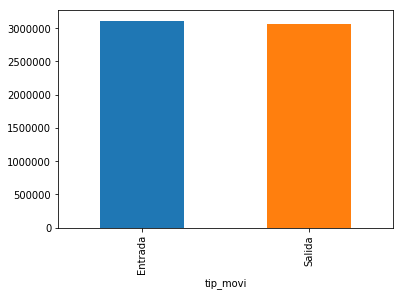

In [42]:
entry_exit_EC_2017.plot.bar()

## Where are people coming from
The "nac_migr" variable contains data of the nationality of the person admitted for entry to Ecuador.  I want to quantify the number of countries visiting Ecuador.

In [25]:
inout2017_noheader['nac_migr'].nunique()

222

In [14]:
tip_movi_tot = inout2017_noheader.loc[:, 'tip_movi':'tip_movi']

In [20]:
g = tip_movi_tot.groupby('tip_movi').tip_movi
pd.concat([g.apply(list), g.count()], axis=1, keys=['tip_movi', 'numberoVeces'])

,tip_movi,numberoVeces
tip_movi,,
Entrada,"[Entrada, Entrada, Entrada, Entrada, Entrada, ...",99999


In [16]:
tip_movi_tot.groupby('tip_movi')['tip_movi'].sum()

tip_movi
Entrada    EntradaEntradaEntradaEntradaEntradaEntradaEntr...
Name: tip_movi, dtype: object